In [234]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [235]:
species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

In [236]:
print(species.head(10))

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   
5   Mammal         Odocoileus virginianus   
6   Mammal                     Sus scrofa   
7   Mammal                  Canis latrans   
8   Mammal                    Canis lupus   
9   Mammal                    Canis rufus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
5                                  White-Tailed Deer  

In [237]:
print(observations.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [238]:
print( 'species table: ', species.shape)
print(species.columns)
print( 'obeservaions table: ' ,observations.shape)
print(species.columns)

species table:  (5824, 4)
Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')
obeservaions table:  (23296, 3)
Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


In [239]:
print(species.describe())

              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  


In [240]:
print(observations.describe())


       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000


In [241]:
print(f'number of species: ' , species.scientific_name.nunique())
print(f'number of categories: ', species.category.nunique())



number of species:  5541
number of categories:  7


In [242]:
print(species.groupby('category').size())

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64


In [243]:
print(f'number of conservation status: ', species.conservation_status.count())
print(f' number of unqiue statuses: ', species.conservation_status.nunique())
print(f'status types: ', species.conservation_status.unique() )

number of conservation status:  191
 number of unqiue statuses:  4
status types:  [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [244]:
print(f'number of unprotected species: ', species.conservation_status.isna().sum())
species.fillna('No Intervention', inplace=True )
(species.groupby('conservation_status').size())

number of unprotected species:  5633


conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

In [245]:
print(f' number of parks: ', observations.park_name.nunique())
print(f'park names: ', observations.park_name.unique())

 number of parks:  4
park names:  ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [246]:
print(f'number of observations:', observations.observations.count())

number of observations: 23296


In [247]:
conservation_categories = species[species.conservation_status != 'No Intervention'].groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()

In [248]:
(conservation_categories)

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


AxesSubplot(0.125,0.125;0.775x0.755)


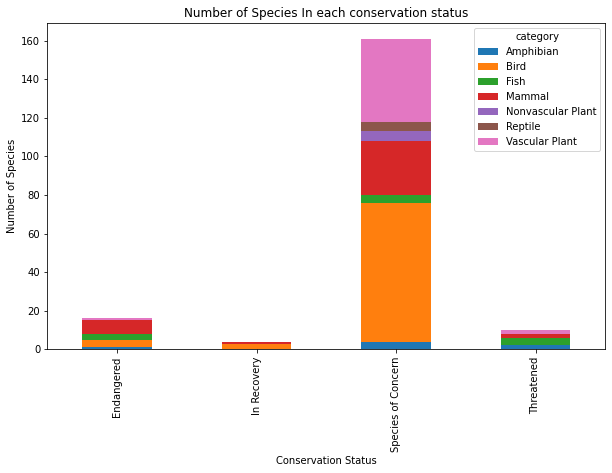

In [249]:
ax = conservation_categories.plot(kind='bar', figsize=(10,6), stacked=True)
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Number of Species')
ax.set_title('Number of Species In each conservation status')
print(ax)

In [250]:
species['is_protected'] = species.conservation_status != 'No Intervention'

In [251]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']



In [252]:
category_counts['percent_protected'] = category_counts.protected / \
(category_counts.protected + category_counts.not_protected) * 100

In [253]:
category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


In [254]:
from scipy.stats import chi2_contingency

In [255]:
contingency_1 = [[30, 146],
                [75, 413]]

mam_v_bird_contingency = (chi2_contingency(contingency_1))
print(mam_v_bird_contingency)

(0.1617014831654557, 0.6875948096661336, 1, array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))


In [256]:
contingency_2 = [[30, 146],
                [5, 73]]
mam_v_rep_contingency = chi2_contingency(contingency_2)
print(mam_v_rep_contingency)

(4.289183096203645, 0.03835559022969898, 1, array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))


In [257]:
from itertools import chain
import string

In [258]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [259]:
common_Names = species[species.category== 'Mammal'].common_names.apply(
remove_punctuation)\
.str.split().tolist()

In [260]:
common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [261]:
cleanRows = []
for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)

In [262]:
cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [263]:
animal_keys = list(chain.from_iterable(i if isinstance (i, list) else [i] for i in cleanRows))

In [264]:
animal_keys[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

In [265]:
words_counted = []

In [266]:
for i in animal_keys:
    x = animal_keys.count(i)
    words_counted.append((i,x))
    

In [267]:
pd.DataFrame(set(words_counted), columns = ['Word', 'Count']).sort_values('Count', ascending=False).head(10)

,Word,Count
199,Bat,23
76,Shrew,18
155,Myotis,17
24,Mouse,16
79,Chipmunk,13
188,Squirrel,12
51,American,12
59,Vole,11
3,Eastern,11
157,Western,10


In [268]:
species['is_shrew'] = species.common_names.str.contains(r'\bBat\b', regex=True)

In [269]:
species[species.is_shrew]

,category,scientific_name,common_names,conservation_status,is_protected,is_shrew
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


In [270]:
shrew_observations = observations.merge(species[species.is_shrew])
shrew_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_shrew
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


In [271]:
shrew_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


In [272]:
obs_by_park = shrew_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()

In [273]:
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


AttributeError: module 'matplotlib' has no attribute 'x_label'

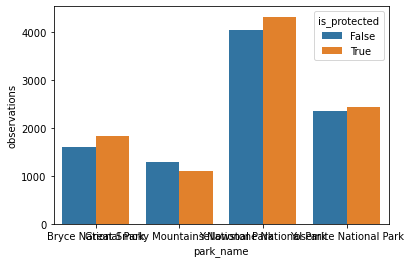

In [277]:
plt.figure.Figure(figsize=(16,4))
sns.barplot(x=obs_by_park.park_name, y=obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Nummber of Observations')
plt.title('Observations of Shrews per Week')
plt.show()
plt.clf()